## 1. Introduction
<p><img src="https://assets.datacamp.com/production/project_1197/img/google_play_store.png" alt="Google Play logo"></p>
<p>Mobile apps are everywhere. They are easy to create and can be very lucrative from the business standpoint. Specifically, Android is expanding as an operating system and has captured more than 74% of the total market<sup><a href="https://www.statista.com/statistics/272698/global-market-share-held-by-mobile-operating-systems-since-2009">[1]</a></sup>. </p>
<p>The Google Play Store apps data has enormous potential to facilitate data-driven decisions and insights for businesses. In this notebook, we will analyze the Android app market by comparing ~10k apps in Google Play across different categories. We will also use the user reviews to draw a qualitative comparision between the apps.</p>
<p>The dataset you will use here was scraped from Google Play Store in September 2018 and was published on <a href="https://www.kaggle.com/lava18/google-play-store-apps">Kaggle</a>. Here are the details: <br>
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/apps.csv</b></div>
This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.
<ul>
    <li><b>App:</b> Name of the app</li>
    <li><b>Category:</b> Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.</li>
    <li><b>Rating:</b> The current average rating (out of 5) of the app on Google Play</li>
    <li><b>Reviews:</b> Number of user reviews given on the app</li>
    <li><b>Size:</b> Size of the app in MB (megabytes)</li>
    <li><b>Installs:</b> Number of times the app was downloaded from Google Play</li>
    <li><b>Type:</b> Whether the app is paid or free</li>
    <li><b>Price:</b> Price of the app in US$</li>
    <li><b>Last Updated:</b> Date on which the app was last updated on Google Play </li>

</ul>
</div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/user_reviews.csv</b></div>
This file contains a random sample of 100 <i>[most helpful first](https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/)</i> user reviews for each app. The text in each review has been pre-processed and passed through a sentiment analyzer.
<ul>
    <li><b>App:</b> Name of the app on which the user review was provided. Matches the `App` column of the `apps.csv` file</li>
    <li><b>Review:</b> The pre-processed user review text</li>
    <li><b>Sentiment Category:</b> Sentiment category of the user review - Positive, Negative or Neutral</li>
    <li><b>Sentiment Score:</b> Sentiment score of the user review. It lies between [-1,1]. A higher score denotes a more positive sentiment.</li>

</ul>
</div>
<p>From here on, it will be your task to explore and manipulate the data until you are able to answer the three questions described in the instructions panel.<br></p>

In [11]:
# Importing the libraries
import numpy as np
import pandas as pd

In [12]:
apps = pd.read_csv('datasets/apps.csv')
apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,"June 20, 2018"
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,"50,000+",Free,0.0,"March 26, 2017"
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,"50,000+",Free,0.0,"April 26, 2018"
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,"1,000,000+",Free,0.0,"June 14, 2018"
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,"1,000,000+",Free,0.0,"September 20, 2017"
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,"10,000+",Free,0.0,"July 3, 2018"


In [44]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           9659 non-null   object 
 1   Category      9659 non-null   object 
 2   Rating        8196 non-null   float64
 3   Reviews       9659 non-null   int64  
 4   Size          8432 non-null   float64
 5   Installs      9659 non-null   object 
 6   Type          9659 non-null   object 
 7   Price         9659 non-null   float64
 8   Last Updated  9659 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 679.3+ KB


In [45]:
apps.dtypes

App              object
Category         object
Rating          float64
Reviews           int64
Size            float64
Installs         object
Type             object
Price           float64
Last Updated     object
dtype: object

In [15]:
apps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [16]:
chars_to_remove = [',','+']

for char in chars_to_remove:
    apps['Installs'] = apps['Installs'].apply(lambda x: x.replace(char,''))

In [17]:
# chars_to_remove =  [',','+']
# for char in chars_to_remove:
#    apps_data['Installs'] = apps_data['Installs'].apply(lambda x: x.replace(char.''))

In [18]:
apps['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: object

In [19]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,"June 20, 2018"


In [20]:
app_category_info = apps.groupby('Category').agg({'App':'count','Price':'mean','Rating':'mean'})

In [21]:
app_category_info



# ALL THIS TO DO IN ONE STEP
# app_data.groupby('Category').agg({'Apps':'count','Price':'mean','Rating':'mean'})

,App,Price,Rating
Category,,,
ART_AND_DESIGN,64,0.093281,4.357377
AUTO_AND_VEHICLES,85,0.158471,4.190411
BEAUTY,53,0.000000,4.278571
BOOKS_AND_REFERENCE,222,0.539505,4.344970
BUSINESS,420,0.417357,4.098479
COMICS,56,0.000000,4.181481
COMMUNICATION,315,0.263937,4.121484
DATING,171,0.160468,3.970149
EDUCATION,119,0.150924,4.364407


In [31]:
reviews = pd.read_csv('datasets/user_reviews.csv')
reviews.head()

,App,Review,Sentiment Category,Sentiment Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25
2,10 Best Foods for You,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40
4,10 Best Foods for You,Best idea us,Positive,1.00


In [23]:
apps.shape

(9659, 9)

In [24]:
reviews['App'].nunique()

1074

In [27]:
reviews.isna().sum()

App                       0
Review                26868
Sentiment Category    26863
Sentiment Score       26863
dtype: int64

In [29]:
finance_apps = apps[apps['Category'] == 'FINANCE']
finance_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
837,K PLUS,FINANCE,4.4,124424,NaN,10000000,Free,0.0,"June 26, 2018"
838,ING Banking,FINANCE,4.4,39041,NaN,1000000,Free,0.0,"August 3, 2018"
839,Citibanamex Movil,FINANCE,3.6,52306,42.0,5000000,Free,0.0,"July 27, 2018"
840,The postal bank,FINANCE,3.7,36718,NaN,5000000,Free,0.0,"July 16, 2018"
841,KTB Netbank,FINANCE,3.8,42644,19.0,5000000,Free,0.0,"June 28, 2018"


In [30]:
free_finance_apps = finance_apps[finance_apps['Type'] == 'Free']
free_finance_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
837,K PLUS,FINANCE,4.4,124424,NaN,10000000,Free,0.0,"June 26, 2018"
838,ING Banking,FINANCE,4.4,39041,NaN,1000000,Free,0.0,"August 3, 2018"
839,Citibanamex Movil,FINANCE,3.6,52306,42.0,5000000,Free,0.0,"July 27, 2018"
840,The postal bank,FINANCE,3.7,36718,NaN,5000000,Free,0.0,"July 16, 2018"
841,KTB Netbank,FINANCE,3.8,42644,19.0,5000000,Free,0.0,"June 28, 2018"


In [32]:
merged_df = pd.merge(free_finance_apps, reviews, on="App")
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 2200 non-null   object 
 1   Category            2200 non-null   object 
 2   Rating              2200 non-null   float64
 3   Reviews             2200 non-null   int64  
 4   Size                1600 non-null   float64
 5   Installs            2200 non-null   object 
 6   Type                2200 non-null   object 
 7   Price               2200 non-null   float64
 8   Last Updated        2200 non-null   object 
 9   Review              1435 non-null   object 
 10  Sentiment Category  1435 non-null   object 
 11  Sentiment Score     1435 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 223.4+ KB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated,Review,Sentiment Category,Sentiment Score
0,Citibanamex Movil,FINANCE,3.6,52306,42.0,5000000,Free,0.0,"July 27, 2018","Forget paying app, designed make fail payments...",Negative,-0.500000
1,Citibanamex Movil,FINANCE,3.6,52306,42.0,5000000,Free,0.0,"July 27, 2018","It's working expected, talking best bank Mexic...",Positive,0.400000
2,Citibanamex Movil,FINANCE,3.6,52306,42.0,5000000,Free,0.0,"July 27, 2018",It has many problems with Android 8.1. You can...,Positive,0.250000
3,Citibanamex Movil,FINANCE,3.6,52306,42.0,5000000,Free,0.0,"July 27, 2018","I changed my phone to a Xiaomi Redmi Note 5, t...",Positive,0.175000
4,Citibanamex Movil,FINANCE,3.6,52306,42.0,5000000,Free,0.0,"July 27, 2018",In her eagerness to make her look pretty with ...,Negative,-0.158333


In [33]:
user_feedback = merged_df.groupby('App')['Sentiment Score'].mean()
user_feedback = user_feedback.to_frame()
user_feedback

,Sentiment Score
App,
A+ Mobile,0.329592
ACE Elite,0.252171
Acorns - Invest Spare Change,0.046667
Amex Mobile,0.175666
Associated Credit Union Mobile,0.388093
BBVA Compass Banking,0.205590
BBVA Spain,0.515086
BZWBK24 mobile,0.326883
Bank of America Mobile Banking,0.180027


In [34]:
ratings = user_feedback['Sentiment Score'].sort_values(ascending=False)

In [35]:
top_10_user_feedback = ratings.to_frame()

In [36]:
top_10_user_feedback =  top_10_user_feedback[:10]
top_10_user_feedback

,Sentiment Score
App,
BBVA Spain,0.515086
Associated Credit Union Mobile,0.388093
BankMobile Vibe App,0.353455
A+ Mobile,0.329592
Current debit card and app made for teens,0.327258
BZWBK24 mobile,0.326883
"Even - organize your money, get paid early",0.283929
Credit Karma,0.270052
Fortune City - A Finance App,0.266966


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

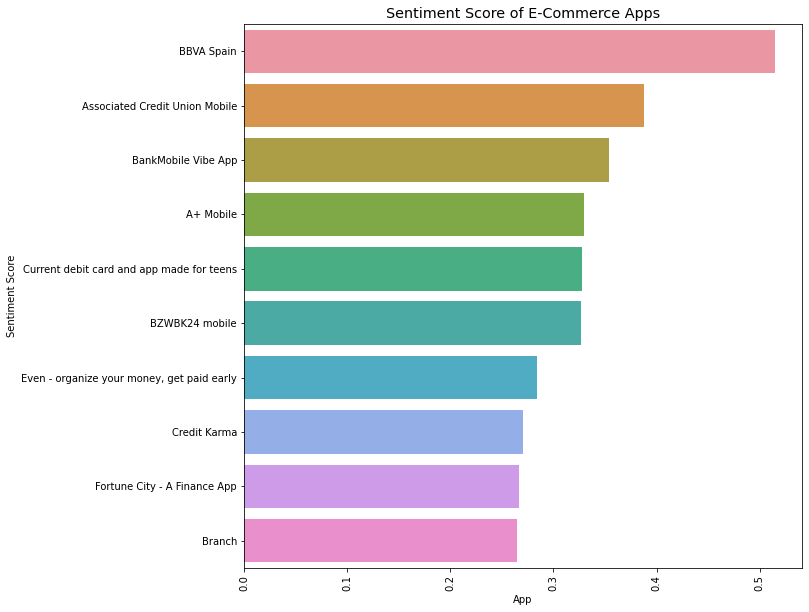

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
plt.style.use('ggplot')
sns.barplot(x=top_10_user_feedback['Sentiment Score'], y=top_10_user_feedback.index)
plt.title("Sentiment Score of E-Commerce Apps")
plt.xticks(rotation=90)
plt.xlabel("App")
plt.ylabel("Sentiment Score")
plt.show()